In [2]:
"""
For this part of analysis we need file with nyc zones: 
http://www.nyc.gov/html/exit-page.html?url=https://s3.amazonaws.com/nyc-tlc/misc/taxi+_zone_lookup.csv
Upload this into your folder and rename into zones.csv
"""
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

taxi=pd.read_csv('datas.csv')
taxi=taxi[['PULocationID', 'DOLocationID']] #take only this columns.
taxi.describe()
"""
everything with datas is all right
len(taxi) = count
places - range(1, 265) - codes of places
"""

,PULocationID,DOLocationID
count,311734.000000,311734.000000
mean,109.966096,135.006406
std,75.154566,77.974435
min,1.000000,1.000000
25%,49.000000,65.000000
50%,80.000000,138.000000
75%,166.000000,210.000000
max,265.000000,265.000000


In [6]:
zones=pd.read_csv('zones.csv')
zones.head()
"""
We have here LocationID. Numbers from PUL... and DOL... should be in this column.
"""

,LocationID,Borough,Zone,service_zone
0,1,EWR,Newark Airport,EWR
1,2,Queens,Jamaica Bay,Boro Zone
2,3,Bronx,Allerton/Pelham Gardens,Boro Zone
3,4,Manhattan,Alphabet City,Yellow Zone
4,5,Staten Island,Arden Heights,Boro Zone


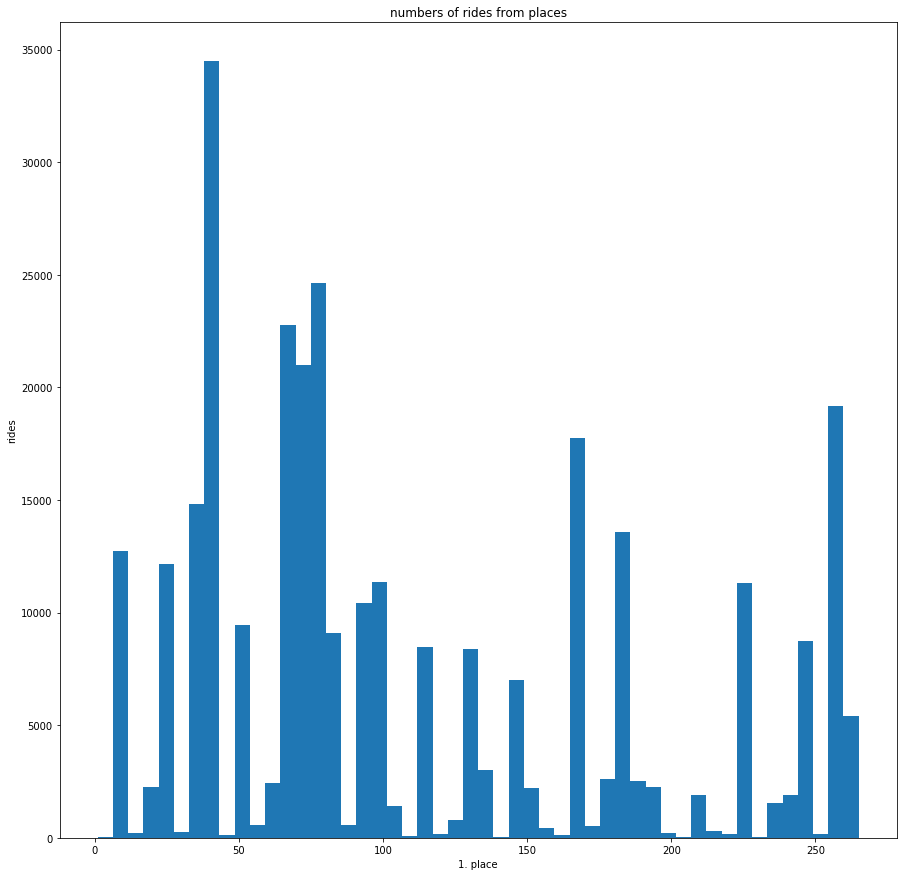

PULocationID
75     21445
74     20672
41     17858
166    17168
255    14470
181    13285
7      12697
33     12569
65     11631
97     11342
66     10823
25     10611
95      8398
244     8242
82      7866
42      7536
223     7477
145     5865
43      5493
52      5132
260     4868
256     4426
130     4419
112     4320
49      4236
116     4109
129     3883
40      3461
80      2740
134     2660
       ...  
194        5
50         4
253        4
13         4
19         4
144        4
158        4
219        4
58         4
261        4
9          3
64         3
207        3
175        3
139        3
122        3
203        2
101        2
96         2
88         2
86         2
38         2
151        1
15         1
224        1
209        1
125        1
115        1
59         1
1          1
Length: 232, dtype: int64


In [4]:
plt.figure(figsize=(15,15))
plt.hist(taxi['PULocationID'], bins=50)
plt.xlabel('1. place')
plt.ylabel('rides')
plt.title('numbers of rides from places')
plt.show()
print(taxi.groupby('PULocationID').size().sort_values(ascending=False))
"""
huge differentiation
max: 75, 74, 41, 166 - Manhattan
min: 1, 59, 115 - Newart Airport, Bronx, Staten Island
"""

Max from 311734 : 11152
Mean from 311734 : 1246.936
(Max - mean) / mean: 7.0


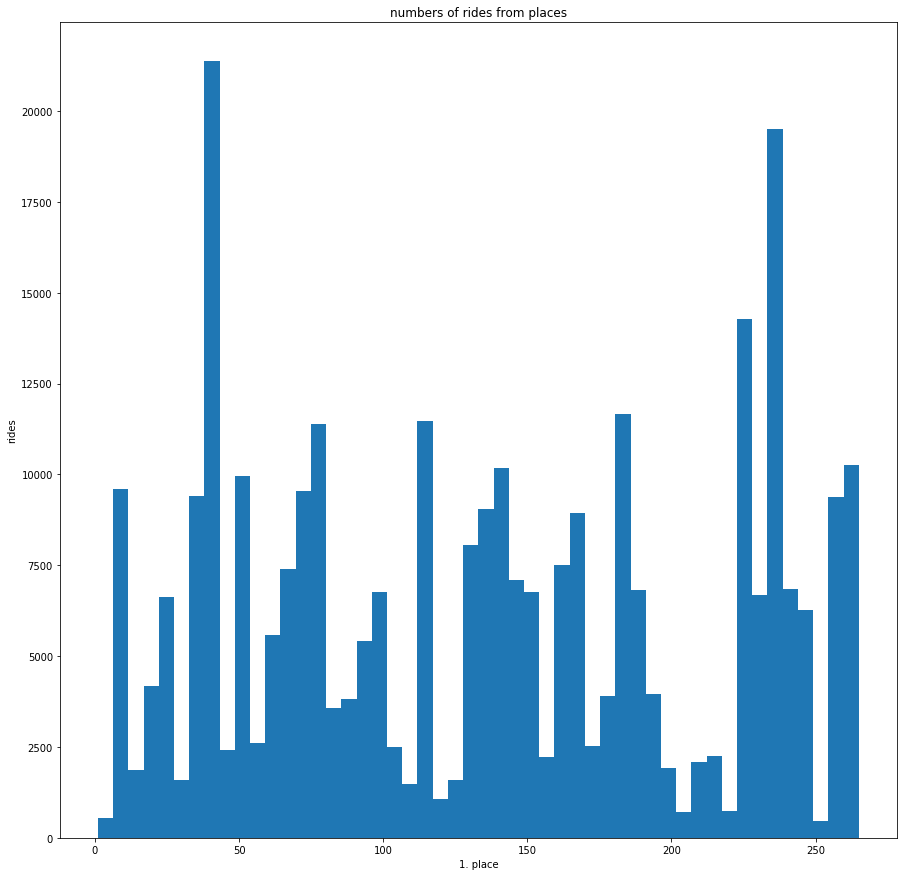

DOLocationID
181    11152
7       8940
74      8225
166     7699
41      7591
236     7296
238     7123
42      6829
49      6276
112     6265
75      6250
223     6100
97      5898
33      5447
263     5061
129     5025
138     4943
239     4768
25      4528
61      4487
95      4333
40      4219
256     3864
151     3848
255     3838
244     3674
17      3544
116     3532
142     3403
237     3400
       ...  
194       38
183       37
207       33
120       31
31        28
57        27
12        26
240       25
117       17
1         15
58        14
86        13
46        12
59         9
253        8
201        8
118        5
206        5
245        5
27         4
154        3
184        3
115        3
251        2
214        2
6          2
221        2
30         2
23         2
187        1
Length: 250, dtype: int64


'\nWe have huge increase at 181 - Brooklyn, Park Slope.\n'

In [14]:
#and do the same for DOLocationID:
print("Max from", len(taxi), ":", taxi.groupby('DOLocationID').size().max())
print("Mean from", len(taxi), ":", taxi.groupby('DOLocationID').size().mean())
print("(Max - mean) / mean:", (taxi.groupby('DOLocationID').size().max() - taxi.groupby('DOLocationID').size().mean())//taxi.groupby('DOLocationID').size().mean())
plt.figure(figsize=(15,15))
plt.hist(taxi['DOLocationID'], bins=50)
plt.xlabel('1. place')
plt.ylabel('rides')
plt.title('numbers of rides from places')
plt.show()
print(taxi.groupby('DOLocationID').size().sort_values(ascending=False))
"""
We have huge increase at 181 - Brooklyn, Park Slope.
7x more rides than in mean value!
Why did people go there?
from Wikipedia:
"historic buildings, top-rated restaurants, bars, and shops, as well as proximity to Prospect Park, 
the Brooklyn Academy of Music, the Brooklyn Botanic Garden, the Brooklyn Museum, 
the Brooklyn Conservatory of Music, and the Central Library as well as the Park Slope branch 
of the Brooklyn Public Library system."


Other max: 
7/74/166/41 - Queens(Astoria)/Manhattan(East Harlem)/Manhattan/Manhattan
"""

In [9]:
"""
Look at locations more precisely
Create new columns: loc_start and loc_stop according to taxi[]==zones['LocationID'] --> zones['Borough']
"""

'\nLook at locations more precisely\n'